In [17]:
# Songgaojun Deng 10442772
import numpy as np
import json
import itertools
import collections
import pandas as pd
from sklearn.svm import SVC,NuSVC
import matplotlib.pyplot as plt
%matplotlib inline

Generate XOR data.  2, 3, and 4 dimension

1. first we define the xor_decimal function to create more nodes with noises. Using only integer values (0/1) will make all the limited integer nodes becoming support vectors.
2. randomly create input elements
3. calculate xor and save it to file


In [18]:
# xor function. if the value of an element is less than 0.5 we consider it 0, and otherwise 1
def xor_decimal(a,b):
    a = 0 if a<0.5 else 1
    b = 0 if b<0.5 else 1
    return int(np.logical_xor(a,b))


# randomly create input elements  -------------------- (2 dimention)
n = 40
a, b = [], []
for i in range(n):
    a.append(np.random.randint(0,2)+ np.random.random()*0.4)
    b.append(np.random.randint(0,2)+ np.random.random()*0.4)

# calculate xor and save it to file (2 dimention)
for i in range(n):
    y = xor_decimal(a[i],b[i])
    with open('xor2_decimal.json','a') as outfile:
        d = {'x1':a[i],'x2':b[i], 'y':y}
        dd = collections.OrderedDict(sorted(d.items()))
        json.dump(dd, outfile)
        outfile.write('\n')
        
# randomly create input elements  -------------------- (3 dimention)
n = 60
a, b, c = [], [], []
for i in range(n):
    a.append(np.random.randint(0,2)+ np.random.random()*0.4)
    b.append(np.random.randint(0,2)+ np.random.random()*0.4)
    c.append(np.random.randint(0,2)+ np.random.random()*0.4)

    # calculate xor and save it to file (3 dimention)
for i in range(n):
    c_t = xor_decimal(a[i],b[i])
    y = xor_decimal(c_t,c[i])
    with open('xor3_decimal.json','a') as outfile:
        r = {'x1':a[i],'x2':b[i],'x3':c[i],'y':y}
        r = collections.OrderedDict(sorted(r.items()))
        json.dump(r, outfile)
        outfile.write('\n')
        
# randomly create input elements  -------------------- (4 dimention)
n = 80
a, b, c, d = [], [], [], []
for i in range(n):
    a.append(np.random.randint(0,2)+ np.random.random()*0.4)
    b.append(np.random.randint(0,2)+ np.random.random()*0.4)
    c.append(np.random.randint(0,2)+ np.random.random()*0.4)
    d.append(np.random.randint(0,2)+ np.random.random()*0.4)

# calculate xor and save it to file (4 dimention)
for i in range(n):
    t1 = xor_decimal(a[i],b[i])
    t2 = xor_decimal(c[i],d[i])
    y = xor_decimal(t1,t2)
    with open('xor4_decimal.json','a') as outfile:
        r = {'x1':a[i],'x2':b[i],'x3':c[i],'x4':d[i],'y':y}
        r = collections.OrderedDict(sorted(r.items()))
        json.dump(r, outfile)
        outfile.write('\n')

Define a function to implement 2-dimention XOR svm and draw results. 

In this function, I print the support vectors the algorithm choosed; support vector ids for futhur removing 
the support vector; number of support vectors; total number of samples; accuracy of the algorithm. Besides,
I draw the points, boundary and margins in plot, in which we could understand more easily.

In [36]:
def svm_and_draw(X,y):
    clf = SVC(kernel='rbf',gamma=3.2) # choose the kernel function RBF, and set the parameters Gamma 3.2 experimentally
    clf.fit(X, y)
    print 'support_vectors_ \n',clf.support_vectors_ 
    print 'support_vectors_ ids',clf.support_ 
    print 'number of support vectors', len(clf.support_)
    print 'sample size',len(y)
    print 'accuracy',clf.score(X,y)
#     print clf.decision_function(clf.support_vectors_)
#     print 'avg_margin' , np.mean(np.absolute((clf.decision_function(clf.support_vectors_))))

    #  ------------------------------------- draw figure below
    fignum = 1
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.axis('tight')
    x_min = -1
    x_max = 2.4
    y_min = -1
    y_max = 2.4
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape) # Put the result into a color plot
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
    return clf.support_ # return support vector ids


support_vectors_ 
[[0.04711404 0.01657009]
 [1.20156732 1.0016412 ]
 [1.34255745 1.39240692]
 [0.32392373 0.37045605]
 [0.348694   0.01007671]
 [1.36085916 1.07982503]
 [1.01665126 1.13669739]
 [1.0872729  0.22513922]
 [1.38765102 0.09089018]
 [0.08355741 1.39776383]
 [0.36271206 1.00313487]
 [1.0278672  0.00767866]
 [0.3939022  1.17801008]]
support_vectors_ ids [ 2  8 13 17 20 34 35  0 16 22 23 25 39]
number of support vectors 13
sample size 40
accuracy 1.0


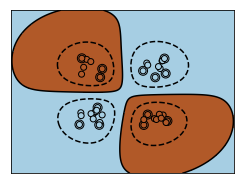

In [37]:
# implement SVM on 2-dimention XOR dataset and visualize the result. 

xor2 = pd.read_json('xor2_decimal.json',lines=True) # read data from file
X_train = xor2.values[:,:2]
y_train = xor2.values[:,2]

support_ = svm_and_draw(X_train,y_train)

support_vectors_ 
[[0.04711404 0.01657009]
 [1.20156732 1.0016412 ]
 [1.34255745 1.39240692]
 [0.32392373 0.37045605]
 [0.348694   0.01007671]
 [1.36085916 1.07982503]
 [1.01665126 1.13669739]
 [1.0872729  0.22513922]
 [1.38765102 0.09089018]
 [0.08355741 1.39776383]
 [0.36271206 1.00313487]
 [1.0278672  0.00767866]
 [0.3939022  1.17801008]]
support_vectors_ ids [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
number of support vectors 13
sample size 13
accuracy 1.0


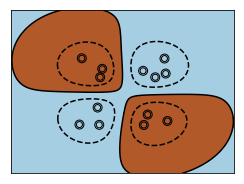

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [38]:
'''
Now  begin  deleting the non-support vectors from your dataset and relearn the classifier. What would happen???
'''
X = X_train[support_] # we only keep support vectors and remove all other samples
y = y_train[support_]

svm_and_draw(X,y)


the support vectors are still support vectors, the decision bounday still the same (margins don't change), 
and the accuracy dose not change. In conclusion, the support vectors are themost important nodes which 
decide the decision boundary.


support_vectors_ 
[[0.06831818 0.26241614]
 [0.35830365 0.06020538]
 [1.0724332  1.29804541]
 [0.39327068 0.21689859]
 [1.31238141 1.34877366]
 [1.27638311 1.18453741]
 [1.32236151 0.21531174]
 [0.15717475 1.37504889]
 [0.22010528 1.329114  ]
 [1.36665039 0.05854925]
 [0.07954357 1.06670197]
 [1.02765574 0.11949346]]
support_vectors_ ids [ 0  1  2  5  8 16 11 13 15 17 18 24]
number of support vectors 12
sample size 27
accuracy 1.0


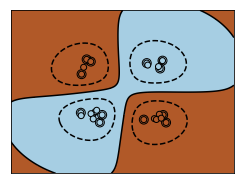

array([ 0,  1,  2,  5,  8, 16, 11, 13, 15, 17, 18, 24], dtype=int32)

In [39]:
'''
What will happen to the margin if the support vectors are removed from the dataset???
'''
# we remove all support vectors
X = np.array(list(itertools.compress(X_train, [i not in support_ for i in range(len(X_train))])))
y = np.array(list(itertools.compress(y_train, [i not in support_ for i in range(len(y_train))])))

svm_and_draw(X,y)

the decision boundary changed as well as the margins. The margins increased

In [23]:
# !!! define a function to implement 3- and 4-dimention XOR svm and only print results. 

def svm_and_print(X,y):
    clf = SVC(kernel='rbf',gamma=3.2) # choose the kernel function RBF, and set the parameters Gamma 3.2 experimentally
    clf.fit(X, y)
#     print 'support_vectors_ \n',clf.support_vectors_ 
    print 'support_vectors_ ids',clf.support_ 
    print 'number of support vectors', len(clf.support_)
    print 'sample size',len(y)
    print 'accuracy',clf.score(X,y)
    print 'avg_margin' , np.mean(np.absolute((clf.decision_function(clf.support_vectors_))))
    
    return clf.support_ # return support vector ids

In [24]:
#implement SVM on 3-dimention XOR dataset. Removing non-support vectors and support vectors.

xor3 = pd.read_json('xor3_decimal.json',lines=True)
X_train = xor3.values[:,:3]
y_train = xor3.values[:,3]

X,y = X_train,y_train
support_ = svm_and_print(X_train,y_train)


#remove non-support
print '\n\nRemove all other points and keep only support vectors. Results are as below. We could see the support vectors didn\'t change surely the margin also no changes. \n'
X,y = X[support_],y[support_]
_ = svm_and_print(X,y)


# remove support vectors
print '\n\nRemove all support vectors. Results are as below. We could see the support vectors changed and surely the margin also changed. \n'
X = np.array(list(itertools.compress(X_train, [i not in support_ for i in range(len(X_train))])))
y = np.array(list(itertools.compress(y_train, [i not in support_ for i in range(len(y_train))])))
_ = svm_and_print(X,y)


support_vectors_ ids [ 0 10 16 17 19 26 28 43 46 47 53 54  7  8  9 13 14 18 32 35 44 50 51 56
 59]
number of support vectors 25
sample size 60
accuracy 1.0
avg_margin 0.9914813850444275


Remove all other points and keep only support vectors. Results are as below. We could see the support vectors didn't change surely the margin also no changes. 

support_vectors_ ids [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
number of support vectors 25
sample size 25
accuracy 1.0
avg_margin 0.9916359880241886


Remove all support vectors. Results are as below. We could see the support vectors changed and surely the margin also changed. 

support_vectors_ ids [ 6 15 17 24 26 29 31 32  2  8 12 14 16 18 22 23 25 27 30]
number of support vectors 19
sample size 35
accuracy 1.0
avg_margin 0.9984075567348899


In [10]:
#implement SVM on 4-dimention XOR dataset. Removing non-support vectors and support vectors.

xor4 = pd.read_json('xor4_decimal.json',lines=True)
X_train = xor4.values[:,:4]
y_train = xor4.values[:,4]

X,y = X_train,y_train
support_ = svm_and_print(X_train,y_train)


#remove non-support
print '\n\nRemove all other points and keep only support vectors. Results are as below. We could see the support vectors didn\'t change surely the margin also no changes. \n'
X,y = X[support_],y[support_]
_ = svm_and_print(X,y)


# remove support vectors
print '\n\nRemove all support vectors. Results are as below. We could see the support vectors changed and surely the margin also changed. \n'
X = np.array(list(itertools.compress(X_train, [i not in support_ for i in range(len(X_train))])))
y = np.array(list(itertools.compress(y_train, [i not in support_ for i in range(len(y_train))])))
_ = svm_and_print(X,y)


support_vectors_ ids [  6  10  19  28  31  36  49  54  56  60  65  72  79  83  86  91  92  96
 101 102 104 106 108 111 114 117 124 128 137 139 141 144 147 148 152 154
 157 158   0   1  12  17  20  27  40  41  43  50  55  57  58  62  64  69
  70  73  77  81  90  97 103 109 113 115 123 143 145 155]
number of support vectors 68
sample size 160
accuracy 1.0
avg_margin 0.9945345726011607


Remove all other points and keep only support vectors. Results are as below. We could see the support vectors didn't change surely the margin also no changes. 

support_vectors_ ids [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
number of support vectors 68
sample size 68
accuracy 1.0
avg_margin 0.9945305041239944


Remove all support vectors. Results are as below. We could see the support vectors changed and surely the margin also changed. 

supp

In above experiment of 3- and 4-dimention of XOR, we could see, the RBF is still very useful to 
classify two classes of samples with accuracy=1.0.